### **PROJECT 4 PROPOSAL LEVEL 2**


**Idea: Unveiling the Android App Market: Analyzing Google Play Store Data**


 **Description:**


 Clean, categorize, and visualize Google Play Store data to understand app market dynamics. Gain in-depth insights into the Android app market by leveraging data analytics, visualization, and enhanced interpretation skills.


 **Dataset:-** https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play



 **Key Concepts and Challenges:**


1. Data Preparation: Clean and correct data types for accuracy.


2. Category Exploration: Investigate app distribution across categories.


3. Metrics Analysis: Examine app ratings, size, popularity, and pricing trends.


4. Sentiment Analysis: Assess user sentiments through reviews.


5. Interactive Visualization: Utilize code for compelling visualizations.


6. Skill Enhancement: Integrate insights from the "Understanding Data Visualization" course.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")

In [4]:
print("Dataset shape:", apps.shape)
print("Dataset shape:", reviews.shape)

Dataset shape: (9659, 14)
Dataset shape: (64295, 5)


In [5]:
# ------------------ Data Cleaning and Preparation ------------------
# Drop duplicates and missing critical values
apps.drop_duplicates(inplace=True)
apps.dropna(subset=['App', 'Category', 'Rating', 'Installs'], inplace=True)
reviews.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)

In [7]:
# Ensure all prices are strings
apps['Price'] = apps['Price'].astype(str)

# Remove '$' and convert to float, replacing non-numeric with 0.0
apps['Price'] = apps['Price'].str.replace('$', '', regex=True)
apps['Price'] = apps['Price'].replace('Free', '0')
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce').fillna(0.0)

In [8]:
# Clean 'Installs'
apps['Installs'] = apps['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce').fillna(0).astype(int)

# Clean 'Price'
apps['Price'] = apps['Price'].astype(str).str.replace('$', '', regex=True)
apps['Price'] = apps['Price'].replace('Free', '0')
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce').fillna(0.0)

In [9]:
# Clean 'Size'
apps['Size'] = apps['Size'].astype(str)
apps['Size'] = apps['Size'].str.replace('M', 'e+6').str.replace('k', 'e+3')
apps['Size'] = apps['Size'].replace('Varies with device', '0')
apps['Size'] = apps['Size'].replace('nan', '0')
apps['Size'] = apps['Size'].apply(lambda x: eval(x) if 'e+' in x else float(x))

C:\Users\ittyavira\AppData\Local\Temp\ipykernel_14568\423206478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis', legend=False)


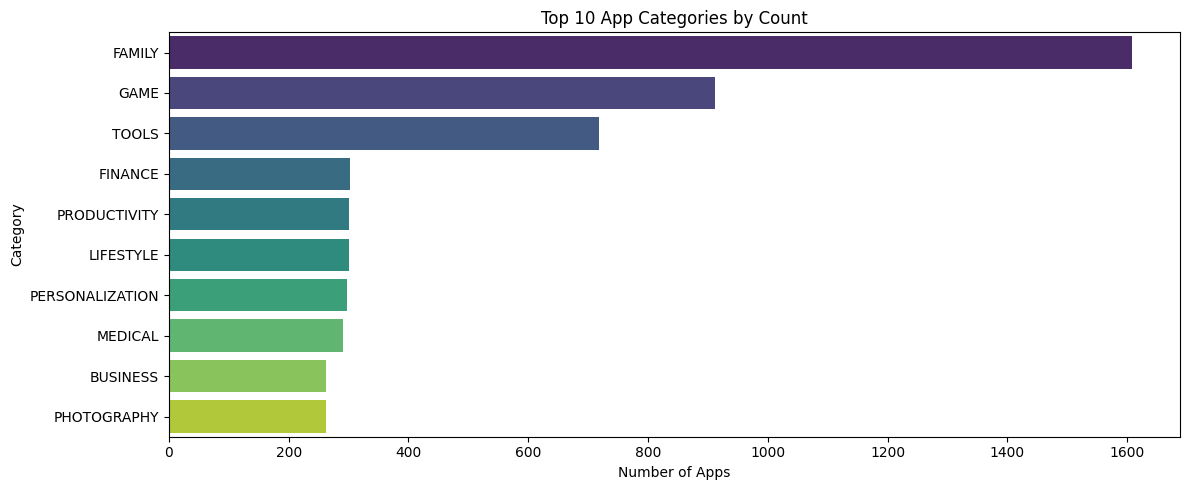

In [20]:
# ------------------ Category Exploration ------------------
plt.figure(figsize=(12, 5))
top_categories = apps['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis', legend=False)
plt.title("Top 10 App Categories by Count")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

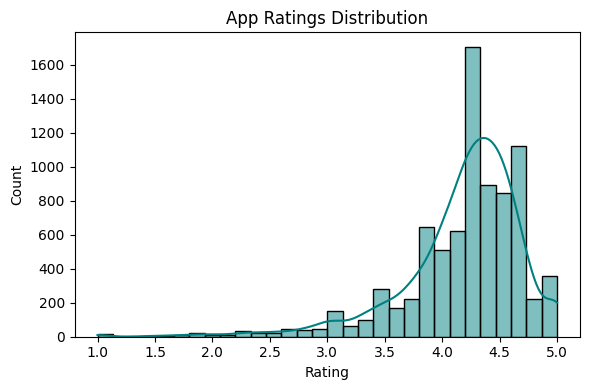

In [11]:
# ------------------ Ratings and Price Analysis ------------------
# Rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(apps['Rating'], bins=30, kde=True, color='teal')
plt.title("App Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\ittyavira\AppData\Local\Temp\ipykernel_14568\334291913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=apps, y='Content Rating', order=apps['Content Rating'].value_counts().index, palette='Set2')


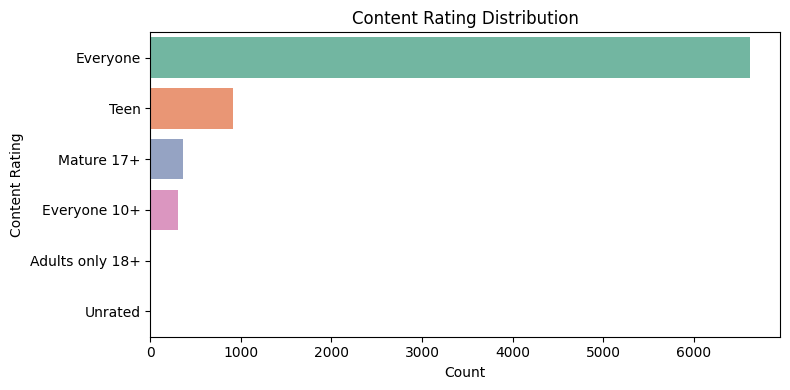

In [23]:
# Content Rating Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=apps, y='Content Rating', order=apps['Content Rating'].value_counts().index, palette='Set2')
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Content Rating')
plt.tight_layout()
plt.show()

C:\Users\ittyavira\AppData\Local\Temp\ipykernel_14568\2149657361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')


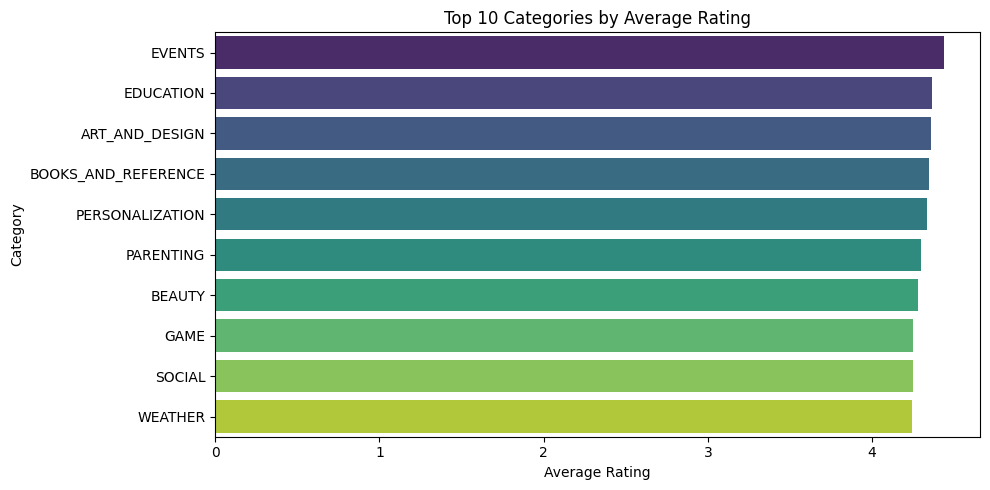

In [ ]:
# Average Rating by Category (Top 10)
plt.figure(figsize=(10, 5))
avg_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

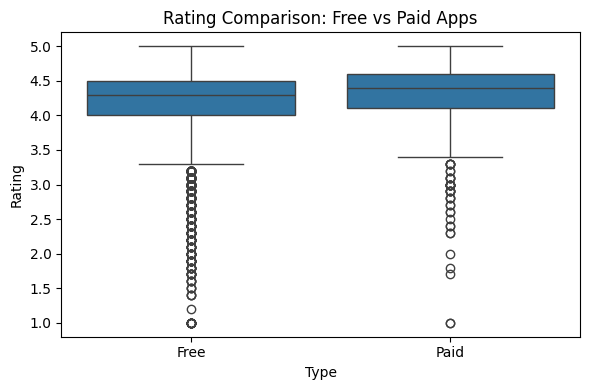

In [12]:
# Free vs Paid Ratings
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Rating', data=apps)
plt.title("Rating Comparison: Free vs Paid Apps")
plt.tight_layout()
plt.show()

C:\Users\ittyavira\AppData\Local\Temp\ipykernel_14568\121111049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='Sentiment', palette='Set2', legend=False)


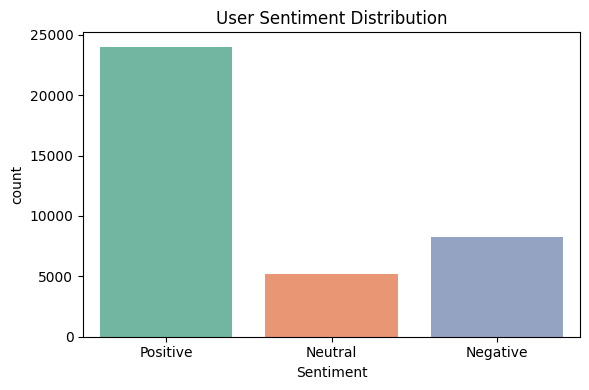

In [21]:
# ------------------ Sentiment Analysis ------------------
# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=reviews, x='Sentiment', palette='Set2', legend=False)
plt.title("User Sentiment Distribution")
plt.tight_layout()
plt.show()

C:\Users\ittyavira\AppData\Local\Temp\ipykernel_14568\3155457892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='magma')


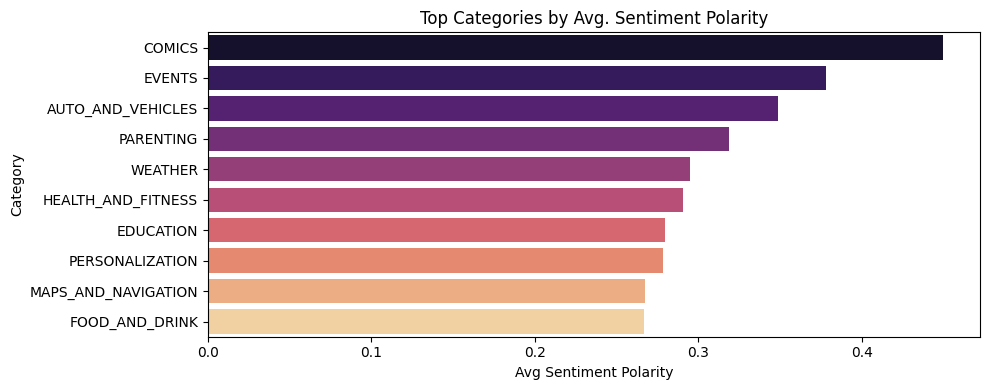

In [22]:
# Avg sentiment polarity per category
merged = pd.merge(reviews, apps[['App', 'Category']], on='App', how='inner')
category_sentiment = merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='magma')
plt.title("Top Categories by Avg. Sentiment Polarity")
plt.xlabel("Avg Sentiment Polarity")
plt.tight_layout()
plt.show()